In [ ]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 
from urllib import request
import csv
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [ ]:
#importo datos
data_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_data.csv" 
fdata = request.urlopen(data_url)
labels_url = "https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_label.csv"
labelsdata = request.urlopen(labels_url)

#visualizacion de los datos
data = pd.read_csv(fdata)
labels = pd.read_csv(labelsdata)

In [ ]:
data

,Unnamed: 0,1.07_114.0671n,1.12_150.0556m/z,1.12_224.0537n,1.13_129.0550m/z,1.15_269.0995m/z,1.17_194.0451m/z,1.17_247.1177m/z,1.18_102.0671n,1.18_145.0502m/z,...,9.56_295.2266m/z,9.56_688.4019n,9.63_660.3709n,9.72_629.3539m/z,9.76_429.2981m/z,9.78_374.2444n,9.78_472.3024n,9.95_237.1486m/z,9.95_702.4173n,9.98_498.3171n
0,20210420_019,87.019471,40.536483,181.357172,546.869445,45.077911,166.800421,263.926834,115.441345,947.994037,...,60.962114,685.861727,370.328128,435.448570,63.767304,165.116329,1306.746525,76.319880,556.706199,447.573857
1,20210420_021,68.644252,42.535985,172.770981,536.750237,36.602159,153.598451,254.598889,107.942448,904.809333,...,55.846733,703.085938,378.748131,436.822593,60.620782,162.477708,1280.568352,74.833557,559.765555,448.057678
2,20210420_023,85.310770,37.775988,181.641203,547.007455,43.492033,168.435256,245.294072,115.644288,948.623283,...,59.841452,667.091289,369.317188,435.448730,63.080944,165.063880,1306.559848,76.300135,548.904251,435.762433
3,20210420_025,182.886662,0.000000,120.055143,0.000000,53.888439,13.536438,418.494145,372.896710,2668.402959,...,86.486659,1490.285661,621.073308,1034.265530,95.745333,432.755695,2489.548822,78.370185,1194.614280,401.409910
4,20210420_027,169.431590,4.546041,298.457567,247.820866,67.565281,131.847910,440.554980,309.431770,2286.748016,...,85.579748,1051.535354,487.816516,785.175224,104.876552,363.884261,2174.680834,108.763407,926.947063,544.896122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,20220523_071,79.516403,38.984035,149.108165,534.700829,44.785520,162.971985,244.980404,112.840824,933.145821,...,68.722755,675.906991,388.633766,493.733872,55.976837,181.047211,1266.112541,77.687264,568.367563,638.791398
615,20220523_073,83.592049,38.067673,151.351200,531.341522,49.598905,155.465703,247.099317,111.615323,925.902524,...,75.247452,677.470028,374.118571,400.053387,66.749691,166.608685,1324.731363,81.640690,576.408286,397.669016
616,20220523_075,83.714187,39.374236,198.587343,567.819251,45.803409,171.089417,265.275403,114.307577,951.727071,...,66.631111,713.554929,387.765677,446.310543,65.403340,164.382350,1319.535904,78.081889,569.346047,458.079079
617,20220523_077,81.278970,43.837626,189.020333,533.190790,32.211350,172.168390,250.841315,117.089493,908.324440,...,58.238231,659.604135,375.140877,455.350762,55.544867,168.144670,1287.154380,75.083862,570.841715,435.165094


In [ ]:
labels

,Unnamed: 0,class
0,20210420_019,NaN
1,20210420_021,NaN
2,20210420_023,NaN
3,20210420_025,healthy
4,20210420_027,healthy
...,...,...
614,20220523_071,NaN
615,20220523_073,NaN
616,20220523_075,NaN
617,20220523_077,NaN


In [ ]:
def coeficientes_filtro(mascara):
  largo = np.size(mascara)
  coeficientes = []
  for i in np.arange(largo):
    if(mascara[i] == True):
      continue
    coeficientes.append(i)
  return coeficientes

In [ ]:
#curado de datos
dataset_data = np.genfromtxt(data_url, dtype= float, delimiter=',', skip_header = 1)
dataset_labels = np.genfromtxt(labels_url, dtype = str,delimiter=',', skip_header = 1)
parametros = dataset_data[:,1:]
labels = dataset_labels[:,1]
mask = np.where(labels != '', True, False)
filtros = coeficientes_filtro(mask)
parametros = np.delete(parametros, filtros, axis=0)
labels = np.delete(labels, filtros, axis = 0)
largo = np.size(labels)
labels[labels == 'healthy'] = 0
labels[labels == 'post-surgery'] = 1
labels[labels == 'benign'] = 2
labels[labels == 'cancer'] = 3
labels = labels.astype(np.int32)
mu = np.mean(parametros, axis=0)
sigma = np.std(parametros, axis=0)
parametros = (parametros - mu)/sigma

In [ ]:
#entrenamiento del modelo
model = tf.keras.Sequential() 
model.add(tf.keras.layers.Dense(4, input_dim=762)) #dense(numero de clases a clasificar, dimension del input)
model.summary() 
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1) 
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = 'accuracy') 
hist = model.fit(x= parametros, y= labels, batch_size = largo, epochs=5000, callbacks=[es])

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 0s 15ms/step - loss: 0.1192 - accuracy: 0.9872
Epoch 2502/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.1192 - accuracy: 0.9872
Epoch 2503/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.1191 - accuracy: 0.9872
Epoch 2504/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.1191 - accuracy: 0.9872
Epoch 2505/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.1190 - accuracy: 0.9872
Epoch 2506/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.1190 - accuracy: 0.9872
Epoch 2507/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.1190 - accuracy: 0.9872
Epoch 2508/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.1189 - accuracy: 0.9872
Epoch 2509/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.1189 - accuracy: 0.9872
Epoch 2510/5000
1/1 [================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        63
           3       1.00      1.00      1.00       147

    accuracy                           1.00       390
   macro avg       1.00      1.00      1.00       390
weighted avg       1.00      1.00      1.00       390



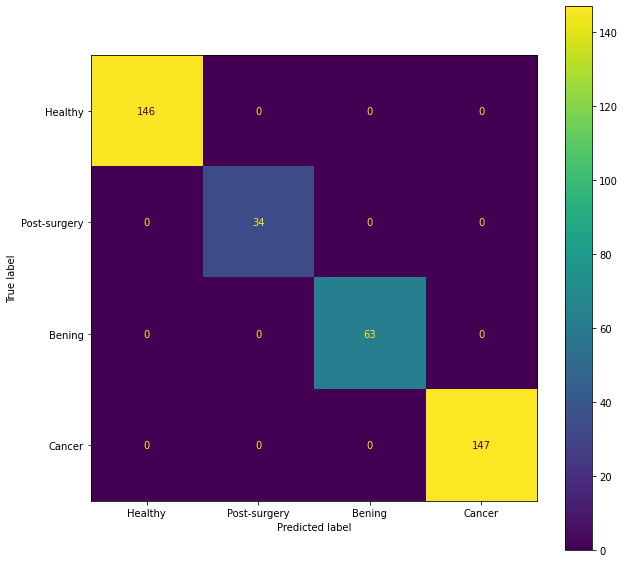

In [ ]:
#confusion matrix
valores_estimados = model.predict(parametros)
resultados_estimados = []
for i in np.arange(largo):
  resultados_estimados.append(np.argmax(valores_estimados[i]))
def show_results(y_true,y_pred):

  # Plot confusion matrix
  fig, ax = plt.subplots(1,1,figsize=(10,10))
  dsp = ConfusionMatrixDisplay.from_predictions(y_true,y_pred,display_labels=["Healthy", "Post-surgery","Bening","Cancer"],ax=ax)

  # Show Classification report
  print(classification_report(y_true,y_pred))

show_results(labels,resultados_estimados)